In [17]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from config import *

In [18]:
engine = create_engine(f'postgresql://{user}:{password}@{host}/{database}')
connection = engine.connect()

In [23]:
#Extract all data from tables and store in dataframes identified by table dictionary
tables = inspect(engine).get_table_names()
dataframes = {}
for table in tables :
    queryString = f'SELECT * FROM {table}'
    data = pd.read_sql(queryString, connection)
    dataframes[table] = data

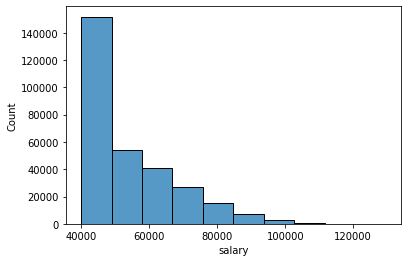

In [25]:
#Histogram of salaries across the company in 10 bins
sn.histplot(dataframes['salaries']['salary'],bins=10)
plt.savefig('./visualization/hist.png')

In [26]:
#Merge dataframes so all relevant data is in the same frame
bar_df = dataframes['salaries'].merge(dataframes['employees'],on='emp_no')
bar_df = bar_df.merge(dataframes['titles'],right_on='title_id',left_on='emp_title_id')

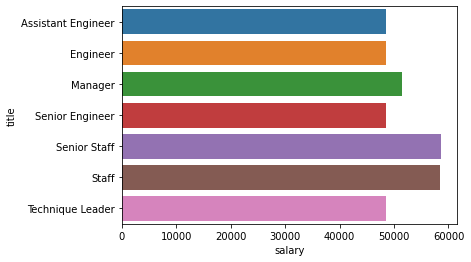

In [27]:
#group by title and find the average salary, plot the result
grp_df = bar_df\
            .groupby('title')['salary']\
                .mean()\
                .reset_index()
sn.barplot(y=grp_df['title'],\
           x=grp_df['salary'])
plt.savefig('./visualization/bar.png')

In [48]:
#Epilogue
dataframes['employees'][emp_df['emp_no'] == 499942]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997
